#VOLTAJE VARIABLE

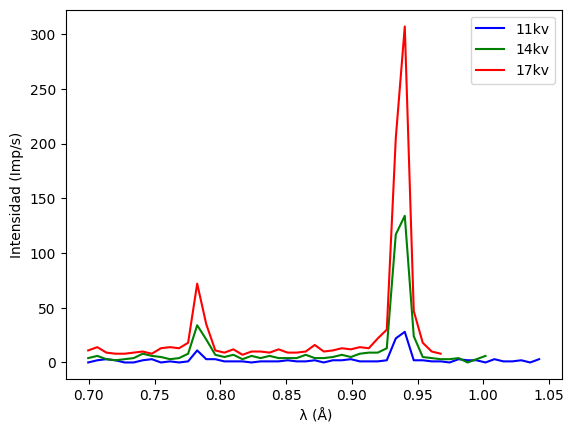

In [89]:
import csv
import numpy as np
import matplotlib.pyplot as plt
tethas=[]
R=[]
d=2.014

#'20kv 1ma picos','23kv 1ma picos','26kv 1ma picos','29kv 1ma picos','32kv 1ma picos','35kv 1ma picos'
#'20kv','23kv','26kv','29kv','32kv','35kv'
labels=['11kv','14kv','17kv']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
files=['11kv 1ma picos','14kv 1ma picos','17kv 1ma picos']
for i in files:

    with open(i, 'r') as file:
        next(file)
        next(file)
        next(file)

        reader = csv.reader(file, delimiter='\t')
        angles=[]
        erre=[]
        for row in reader:
            tetha=np.deg2rad(float(row[0].replace(",", "."))-7)
            lambda_= d*np.sin(tetha)*2
            angles.append(lambda_)

            erre.append(float(row[1].replace(",", ".")))

        tethas.append(angles)
        R.append(erre)
for i in range(len(files)):

    plt.plot(tethas[i], R[i], color=colors[i], label=labels[i])
    #plt.scatter(tethas[i], R[i], color=colors[i],label=labels[i])

plt.xlabel(' λ (Å)')
plt.ylabel('Intensidad (Imp/s)')
plt.legend()
plt.show()



In [90]:
#Graficamos corriente al cuadrado vs voltaje a la 3

intensidad= R.copy()
kas=[]
kbs=[]
ia=1e-3
uk=9.979e3*1.602e-19

v=np.array([11e3-uk,14e3-uk,17e3-uk])
result = np.power(v, 3)

for i in intensidad:
    ka= max(i)
    i.remove(ka)
    kb=max(i)

    kas.append(ka*ka)
    kbs.append(kb*kb)

Slope1:15.57750000000001+/-5.688920877459978
Intercept1:-180422.00000000017+/-80854.75738322391


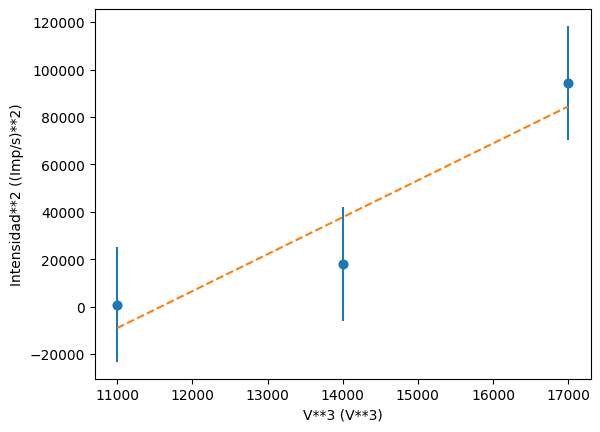

In [91]:
#Grafica de los kas para v


A1 = np.vstack([v, np.ones(len(v))]).T
m1, c1 = np.linalg.lstsq(A1, kas, rcond=None)[0]
residuals = kas - (m1 * v + c1)
residual_sum_of_squares = np.sum(residuals ** 2)
std_err = np.sqrt(residual_sum_of_squares / (len(v) - 2)) 
std_err_slope = std_err / np.sqrt(np.sum((v - np.mean(v)) ** 2)) 
std_err_intercept = std_err_slope * np.sqrt(np.sum(v ** 2) / len(v))
                                            
print("Slope1:" + str(m1) + "+/-"+ str(std_err_slope))
print("Intercept1:"+ str(c1)+"+/-"+ str(std_err_intercept))

plt.errorbar(v, kas, yerr=std_err, fmt='o')
plt.plot(v, m1*v + c1, linestyle='--')
plt.scatter(v, kas)
plt.xlabel('V**3 (V**3)')
plt.ylabel('Intensidad**2 ((Imp/s)**2)')
plt.show()





Slope1:15.57750000000001+/-1.45598115385137
Intercept1:-180422.00000000017+/-20693.380253472707


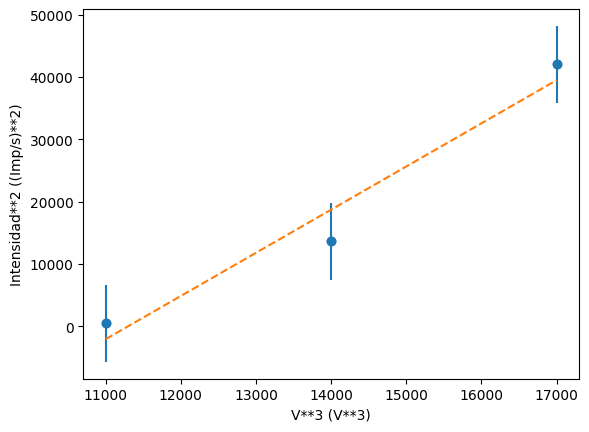

In [92]:
#Grafica de los kbs para v
A2 = np.vstack([v, np.ones(len(v))]).T
m2, c2 = np.linalg.lstsq(A2, kbs, rcond=None)[0]
residuals = kbs - (m2 * v + c2)
residual_sum_of_squares = np.sum(residuals ** 2)
std_err = np.sqrt(residual_sum_of_squares / (len(v) - 2)) 
std_err_slope = std_err / np.sqrt(np.sum((v - np.mean(v)) ** 2)) 
std_err_intercept = std_err_slope * np.sqrt(np.sum(v ** 2) / len(v))
                                            
print("Slope1:" + str(m1) + "+/-"+ str(std_err_slope))
print("Intercept1:"+ str(c1)+"+/-"+ str(std_err_intercept))

plt.errorbar(v, kbs, yerr=std_err, fmt='o')
plt.plot(v, m2*v + c2, linestyle='--')
plt.scatter(v, kbs)
plt.xlabel('V**3 (V**3)')
plt.ylabel('Intensidad**2 ((Imp/s)**2)')
plt.show()


CORRIENTE VARIABLE

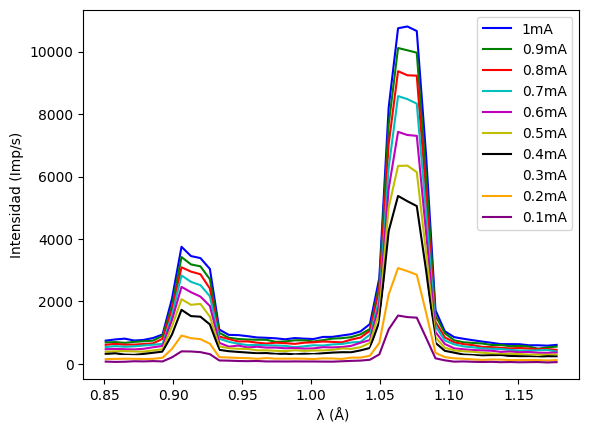

In [93]:
import csv
import numpy as np
import matplotlib.pyplot as plt
tethas=[]
R=[]
d=2.014

labels=['1mA','0.9mA','0.8mA','0.7mA','0.6mA','0.5mA','0.4mA','0.3mA','0.2mA','0.1mA']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','orange','purple']
files=['1mA 35kv picos.txt','0.9mA 35kv picos.txt','0.8mA 35kv picos.txt',
       '0.7mA 35kv picos.txt','0.6mA 35kv picos.txt','0.5mA 35kv picos.txt',
       '0.4mA 35kv picos.txt','0.3mA 35kv picos.txt','0.2mA 35kv picos.txt','0.1mA 35kv picos.txt']

for i in files:

    with open(i, 'r') as file:
        next(file)
        next(file)
        next(file)
        reader = csv.reader(file, delimiter='\t')
        angles=[]
        erre=[]
        for row in reader:
            tetha=np.deg2rad(float(row[0].replace(",", "."))-7)
            lambda_= d*np.sin(tetha)*2
            angles.append(lambda_)

            erre.append(float(row[1].replace(",", ".")))

        tethas.append(angles)
        R.append(erre)
for i in range(len(files)):

    plt.plot(tethas[i], R[i], color=colors[i], label=labels[i])
    #plt.scatter(tethas[i], R[i], color=colors[i],label=labels[i])

plt.xlabel(' λ (Å)')
plt.ylabel('Intensidad (Imp/s)')
plt.legend()
plt.show()



In [94]:
#Graficamos corriente  vs voltaje 

intensidad= R.copy()
kas=[]
kbs=[]
ia=1e-3
V=(35e3-(9.979e3*1.602e-19))**(3/2)

I=np.array([1e-3,0.9e-3,0.8e-3,0.7e-3,0.6e-3,0.5e-3,0.4e-3,0.3e-3,0.2e-3,0.1e-3])


for i in intensidad:
    ka= max(i)
    i.remove(ka)
    kb=max(i)

    kas.append(ka)
    kbs.append(kb)

Slope1:10242848.48484849+/-355800.2942707076
Intercept1:1055.7333333333347+/-220.76827675234958


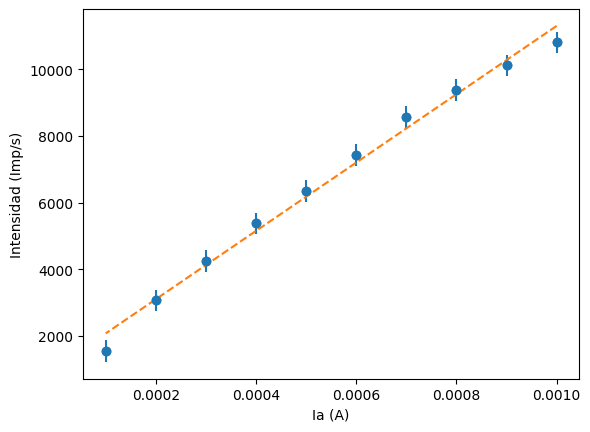

In [95]:
#Grafica de los kas para I


A1 = np.vstack([I, np.ones(len(I))]).T
m1, c1 = np.linalg.lstsq(A1, kas, rcond=None)[0]
residuals = kas - (m1 * I + c1)
residual_sum_of_squares = np.sum(residuals ** 2)
std_err = np.sqrt(residual_sum_of_squares / (len(I) - 2)) 
std_err_slope = std_err / np.sqrt(np.sum((I - np.mean(I)) ** 2)) 
std_err_intercept = std_err_slope * np.sqrt(np.sum(I ** 2) / len(I))
                                            
print("Slope1:" + str(m1) + "+/-"+ str(std_err_slope))
print("Intercept1:"+ str(c1)+"+/-"+ str(std_err_intercept))

plt.errorbar(I, kas, yerr=std_err, fmt='o')
plt.plot(I, m1*I + c1, linestyle='--')
plt.scatter(I, kas)
plt.xlabel('Ia (A)')
plt.ylabel('Intensidad (Imp/s)')
plt.show()


Slope1:10231393.939393943+/-353910.3726686491
Intercept1:978.9333333333343+/-219.5956112374469


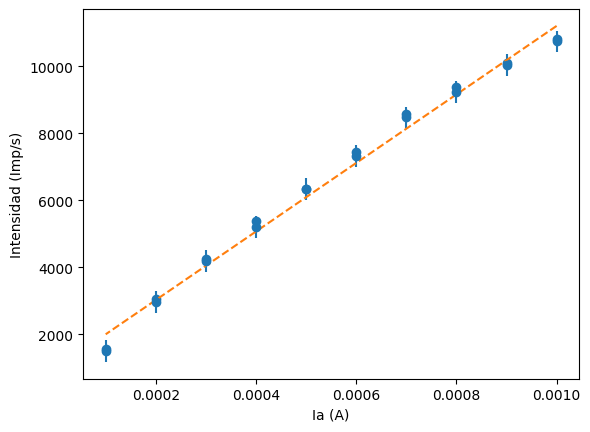

In [96]:
#Grafica de los kbs para I


A2 = np.vstack([I, np.ones(len(I))]).T
m2, c2 = np.linalg.lstsq(A2, kbs, rcond=None)[0]
residuals = kbs - (m1 * I + c1)
residual_sum_of_squares = np.sum(residuals ** 2)
std_err = np.sqrt(residual_sum_of_squares / (len(I) - 2)) 
std_err_slope = std_err / np.sqrt(np.sum((I - np.mean(I)) ** 2)) 
std_err_intercept = std_err_slope * np.sqrt(np.sum(I ** 2) / len(I))
                                            
print("Slope1:" + str(m2) + "+/-"+ str(std_err_slope))
print("Intercept1:"+ str(c2)+"+/-"+ str(std_err_intercept))

plt.errorbar(I, kbs, yerr=std_err, fmt='o')
plt.plot(I, m2*I + c2, linestyle='--')
plt.scatter(I, kas)
plt.xlabel('Ia (A)')
plt.ylabel('Intensidad (Imp/s)')
plt.show()
